In [31]:
import igraph as ig
import numpy as np
import louvain
import time

print("Construct the graph from the txt file (edgelist)")
########################
# Polblogs
name = "pol_blogs"
input = np.loadtxt("../data/PolBlogs/PolBlogsAdj.txt", dtype='i', delimiter='\t');
dim = input.shape;
N = dim[0];

g = ig.Graph();
g.add_vertices(N);
for i in range(0, N-1):
    for j in range(0,N-1):
        if input[i,j]==1:
            g.add_edges([(i,j)]);
            
ig.summary(g)
########################
# Wikivote
# input = np.loadtxt("../data/Wikivote/wiki-Vote.txt", dtype='i', delimiter='\t');
# dim = input.shape;
# g = ig.Graph();
# N = input.max();
# g.add_vertices(N);
# for i in range(0, dim[0]):
#     g.add_edges([(input[i,0]-1,input[i,1]-1)]);
#     #if np.mod(i,100)==0: 
#      #   print(i)
# ig.summary(g)
########################
# # PowerEU
# name = "power_eu"
# input = np.loadtxt("../data/PowerEU/ElistPowerEU.txt", dtype='i', delimiter=' ');
# dim = input.shape;
# N = input.max();
# g = ig.Graph();
# g.add_vertices(N);
# for i in range(0, dim[0]):
#     g.add_edges([(input[i,0]-1,input[i,1]-1)]);
# ig.summary(g)
########################
# CondMat2003
#g = ig.Graph.Read_Ncol('../data/CondMat2003/CondMat2003EList.txt', directed=False);
########################
# Internet
# g = ig.Graph.Read_Ncol('../data/Internet/InternetElist.txt', directed=False);
########################
# # PowerUS
# input = np.loadtxt("../data/PowerUS/ElistPowerUS.txt", dtype='i', delimiter=' ');
# dim = input.shape;
# N = input.max();
# g = ig.Graph();
# g.add_vertices(N);
# for i in range(0, dim[0]):
#     g.add_edges([(input[i,0]-1,input[i,1]-1)]);
# ig.summary(g)
########################
# # Facebook
# g = ig.Graph.Read_Ncol('../data/Facebook/facebook-gender_edges.txt', directed=False);
########################
# # Pokec
# g = ig.Graph.Read_Ncol('../data/Pokec/soc-pokec-relationships.txt', directed=False);
########################

# selects largest connected component

print("Largest connected component")
largest = g.clusters().giant();
N = largest.vcount()
ig.summary(largest)
# save cc in txt
ig.write(largest,filename="edge_lists/"+name+"_largest.txt",format = "edgelist")

Construct the graph from the txt file (edgelist)
IGRAPH U--- 1490 18959 -- 
Largest connected component
IGRAPH U--- 1221 18958 -- 


/var/folders/b7/w5j5st2x5d9f77725jtxfcqh0000gn/T/ipykernel_10225/3884210550.py:71: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  largest = g.clusters().giant();


In [32]:
print("Running Louvain 1 times in C++")
start_time = time.time()

part = louvain.find_partition(largest, louvain.ModularityVertexPartition);

        
print("--- %s seconds ---" % (time.time() - start_time))

print("Modularity :",part.modularity)
print("Sizes of the groups:", part.sizes())
print("Nb of  groups:", len(part.sizes()))

Running Louvain 1 times in C++
--- 0.06368875503540039 seconds ---
Modularity : 0.43204641398016086
Sizes of the groups: [642, 512, 41, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2]
Nb of  groups: 13


In [34]:
# node2vec embedding with the original code 
# https://github.com/aditya-grover/node2vec
# simply adapted to be compatible with python3
!python3 node2vec-master/src/main.py --input edge_lists/power_eu_largest.txt --output emb/power_eu.emd
print("Loading embedding vectors")
input = np.loadtxt("emb/"+name+".emd", skiprows=1)
id = input[:,0]
embed_vectors = input[:,1:]

Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
Loading embedding vectors


In [38]:
embed_vectors.shape

(1221, 128)

In [136]:
# print("Running Louvain 10 times in C++")
# start_time = time.time()

# m_best =0;
# part_best = louvain.find_partition(largest, louvain.ModularityVertexPartition);


# for n in range(10):
#     part = louvain.find_partition(largest, louvain.ModularityVertexPartition);
#     m = part.modularity;

#     if m_best<m:
#         m_best = m;
#         part_best = part;
        

# print("--- %s seconds ---" % (time.time() - start_time))

# print("Modularity :",part_best.modularity)
# print("Sizes of the groups:", part_best.sizes())

In [39]:

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pca = PCA(n_components=10)
pca.fit(embed_vectors)
#print(pca.singular_values_)
embedding = pca.transform(embed_vectors)

max_nb_clusters = 30
modularities = [] 
for k in range(2,max_nb_clusters+1):
    print(k)
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(embed_vectors)
    community = kmeans.labels_
    mod_partition = largest.modularity(community)
    print(mod_partition)
    modularities.append(mod_partition)

modularities

2
0.007903544640981308
3
0.02348616061705673
4
0.02666884747012569
5
0.02775275607432943
6
0.022139985768286137
7
0.016861450502502234
8
0.016282742477107284
9
0.008862592977223353
10
0.008275338900797373
11
0.0056698422900084665
12
0.0040204335732356294
13
0.006310021227149834
14
0.008195373572250225
15
0.006322669883502484
16
0.007877141335997047
17
0.006573617444822056
18
0.0075505828559833624
19
0.009526449887431409
20
0.008286265269802414
21
0.009497854074482785
22
0.0074559196552006326
23
0.0084740752794382
24
0.007308790684837212
25
0.006625384839403968
26
0.006710569895033738
27
0.007298258021259781
28
0.006703807343501589
29
0.0058397700043564165
30
0.006203268626487581


[0.007903544640981308,
 0.02348616061705673,
 0.02666884747012569,
 0.02775275607432943,
 0.022139985768286137,
 0.016861450502502234,
 0.016282742477107284,
 0.008862592977223353,
 0.008275338900797373,
 0.0056698422900084665,
 0.0040204335732356294,
 0.006310021227149834,
 0.008195373572250225,
 0.006322669883502484,
 0.007877141335997047,
 0.006573617444822056,
 0.0075505828559833624,
 0.009526449887431409,
 0.008286265269802414,
 0.009497854074482785,
 0.0074559196552006326,
 0.0084740752794382,
 0.007308790684837212,
 0.006625384839403968,
 0.006710569895033738,
 0.007298258021259781,
 0.006703807343501589,
 0.0058397700043564165,
 0.006203268626487581]

<function matplotlib.pyplot.show(close=None, block=None)>

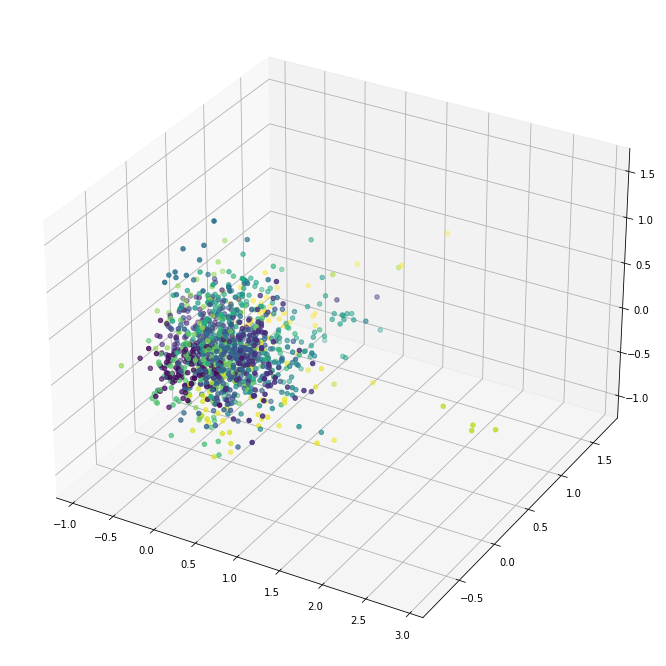

In [36]:
x=embedding[:,1]
y=embedding[:,2]
z=embedding[:,3]
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z,c=community)
plt.show